### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def optimal_sol(x):
    return np.zeros_like(x)

#The given function has the minimum at x = 0 we can do that by making gradient zero

In [3]:
def is_convex(x,kappa):
    #We need to check if the hessian is positive definite or not and that depends on kapa
    if(Hess(x,kappa)[-1][-1]>0):
        return True

### Finding alpha

The characteristic equation of this hessian is ($\lambda_1$ -$x_1$)...($\lambda_1$-$\kappa$*$x_1$)=0

Hence we check the least value of $x_i$ in the vector to get alpha as $\lambda_m$(H(X))>=alpha

In [4]:
def alpha_(x,kappa):
    return Hess(x,kappa)[Hess(x,kappa)!=0].min()

To find $\beta$, we use $\kappa$=$\beta$/$\alpha$

In [5]:
def beta_(x,kappa):
    return Hess(x,kappa).max()

Hessian of the given equation is a diagonal matrix with the last corner element as kappa

In [6]:
def Hess(x,kappa):
    n=x.shape[0]
    p=np.zeros((n,n))
    for i in range (n):
        for j in range (n):
            if(i==j and i!=n-1):
                p[i,j] += 1
    
    p[n-1,n-1] += kappa
    return p

The differentiation of the equation gives the same vector with last term multiplied with $\kappa$

In [7]:
def diff(x,kappa):
    n=x.shape[0]
    p=x.copy()
    p[n-1] *= kappa
    return p 

Gradient descent for T iterations

In [8]:
def gradient_descent(x,T,a,kappa):
    p=x.copy()
    fgd=np.zeros(T)
    for i in range (T):
        fgd[i]=f(p,kappa) # computing the function values 
        p = p - a*diff(p,kappa)
    return p ,fgd 

Accelerated Gradient Descnet 

In [9]:
def acc_descent(x,T,alpha,kappa):
    beta=alpha*kappa
    y=x.copy()
    p=x.copy()
    k=np.sqrt(kappa)
    c1=1+((k-1)/(k+1))
    c2=(k-1)/(k+1)
    facc=np.zeros(T)
    for i in range(T):
        y_prev=y.copy()
        y=p - (1/beta)*diff(p,kappa)
        facc[i]=f(p,kappa)
        p=c1*y - c2*y_prev
    return p ,facc

Momentum Descent for T iterations each for differing values of $\mu$

In [10]:
def momentum_descent(x, T, a, kappa, myu):
    p = x.copy()
    v = np.zeros_like(x)
    fmom = np.zeros(T)

    for i in range(T):
        fmom[i] = f(p, kappa)
        v = myu * v - a * diff(p, kappa)   
        p = p + v                          

    return p, fmom


Given function for array x and $\kappa$

In [11]:
def f(x,kappa):
    f=0.5 * np.sum(x**2) + kappa * (0.5 * x[-1]**2)
    return f

Computing all the function altogether

In [12]:
def function(x0,kappa,eta,T):
    is_convex_ = is_convex(x0,kappa) #checking if the given function is convex or not 
    dx = diff(x0,kappa)
    hess = Hess(x0,kappa)
    alpha=alpha_(x0,kappa)
    beta=beta_(x0,kappa)
    gdx ,fgd=gradient_descent(x0,T,eta,kappa)
    x_acc,facc=acc_descent(x0,T,alpha,kappa)
    myu = [0.4,0.6,0.8]
    fmom_all=np.array([])
    mom_desc_all = np.array([])
    for j in myu :
        mom_desc , fmom = momentum_descent(x0,T,(1/beta),k,j)

        if j==0.4:
            fmom_all=fmom.copy()
            mom_desc_all=mom_desc.copy()
        else:
            fmom_all=np.vstack((fmom_all,fmom))
            mom_desc_all=np.vstack((mom_desc_all,mom_desc))
    lfgd=np.log(fgd)
    lacc=np.log(facc)
    lfmom_all=np.log(fmom_all)
    return is_convex_,dx,hess,alpha,beta,gdx,fgd,x_acc,facc,mom_desc_all,fmom_all,lfgd,lacc,lfmom_all

Generating the random vector 

In [13]:
z = np.random.normal(0,1,100)

x0=100*z
k=5
print(x0)

[  88.26248484   92.70969585   88.69526898   69.67724487   72.02309968
  121.60193833   -6.26671615   67.06457771  -78.9531069    -9.35637311
 -167.29282843   -0.60642442  -29.13763417   54.0151218   -35.42377738
  197.41317623  139.20016364 -148.8296988  -174.44941148  172.81384216
  157.74397045 -209.61771375   58.95431652  -24.9345484    -9.90308646
  -24.13486665   15.96741431 -108.28663078   72.68002176   13.6920446
  101.75053861  -39.89048455  -77.17199975  -77.94337816  109.85999841
  121.78164744  212.5567416  -108.08821728   59.9681319  -146.13553209
  -45.38831803   46.55260617 -107.94611125  143.68144056   42.80577742
  -29.99727227 -143.38201471   32.83093307   15.02050352   10.35369725
  123.05335509   38.8105184  -209.1723937    91.78903085   87.6402331
  -31.74895684   51.70947485   27.77531942  115.95303376  -50.71450075
   28.42345457    3.24369305  -30.62263071   63.5573179   -14.67769177
 -129.54762846 -216.54894878   11.53730251    3.12135824  114.8014825
   25.724

In [14]:
print("Optimal Solution:", optimal_sol(x0)) #this remains same for all eta and kappa

Optimal Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Computing the functions for $\kappa$=5 , step size = 1/$\beta$ and T=200

In [15]:
eta = 1/beta_(x0,k)
gamma = 1/(np.sqrt(k)-1)
T=200
time_array=np.arange(T)+1

In [16]:
is_convex_, dx, hess, alpha, beta, gdx, fgd, x_acc, facc, mom_desc_all, fmom_all, lfgd, lfacc, lfmom_all=function(x0, k, eta, T)

In [17]:
print("Convexity:",is_convex_)
print("Alpha:",alpha)
print("Beta:",beta)
upper_bound=np.exp(-time_array / k)*f(x0,k)
lower_bound=np.exp((1+gamma)**(-time_array))*(alpha+beta)/2

Convexity: True
Alpha: 1.0
Beta: 5.0


In [18]:
print(dx)
print(hess)

[  88.26248484   92.70969585   88.69526898   69.67724487   72.02309968
  121.60193833   -6.26671615   67.06457771  -78.9531069    -9.35637311
 -167.29282843   -0.60642442  -29.13763417   54.0151218   -35.42377738
  197.41317623  139.20016364 -148.8296988  -174.44941148  172.81384216
  157.74397045 -209.61771375   58.95431652  -24.9345484    -9.90308646
  -24.13486665   15.96741431 -108.28663078   72.68002176   13.6920446
  101.75053861  -39.89048455  -77.17199975  -77.94337816  109.85999841
  121.78164744  212.5567416  -108.08821728   59.9681319  -146.13553209
  -45.38831803   46.55260617 -107.94611125  143.68144056   42.80577742
  -29.99727227 -143.38201471   32.83093307   15.02050352   10.35369725
  123.05335509   38.8105184  -209.1723937    91.78903085   87.6402331
  -31.74895684   51.70947485   27.77531942  115.95303376  -50.71450075
   28.42345457    3.24369305  -30.62263071   63.5573179   -14.67769177
 -129.54762846 -216.54894878   11.53730251    3.12135824  114.8014825
   25.724

Gradient Descent and f($x_{gd}$) v T values

In [19]:
print("Gradient Descent:\n",gdx,"\n")
print("\nf(x) v T\n",fgd,"\n")

Gradient Descent:
 [ 3.66246555e-18  3.84700326e-18  3.68042400e-18  2.89126812e-18
  2.98860973e-18  5.04589136e-18 -2.60038362e-19  2.78285509e-18
 -3.27617146e-18 -3.88244159e-19 -6.94184196e-18 -2.51636759e-20
 -1.20907067e-18  2.24136589e-18 -1.46991516e-18  8.19169048e-18
  5.77613246e-18 -6.17571152e-18 -7.23880549e-18  7.17093729e-18
  6.54561061e-18 -8.69811967e-18  2.44631854e-18 -1.03466297e-18
 -4.10930114e-19 -1.00148005e-18  6.62570343e-19 -4.49337060e-18
  3.01586882e-18  5.68153522e-19  4.22215444e-18 -1.65526187e-18
 -3.20226414e-18 -3.23427261e-18  4.55865774e-18  5.05334842e-18
  8.82007509e-18 -4.48513740e-18  2.48838697e-18 -6.06391666e-18
 -1.88339532e-18  1.93170764e-18 -4.47924069e-18  5.96208375e-18
  1.77623240e-18 -1.24474148e-18 -5.94965902e-18  1.36232468e-18
  6.23278132e-19  4.29628279e-19  5.10611813e-18  1.61044850e-18
 -8.67964104e-18  3.80880013e-18  3.63664512e-18 -1.31742791e-18
  2.14569271e-18  1.15254120e-18  4.81148919e-18 -2.10440610e-18
  1.17

 Accelerated Descent solution and F($x_{acc}$) v T

In [20]:
print("Accelerated Descent\n", x_acc, "\n")
print("\nf(x) v T\n", facc)

Accelerated Descent
 [ 1.79982362e-48  1.89050989e-48  1.80864883e-48  1.42083867e-48
  1.46867467e-48  2.47967232e-48 -1.27789103e-49  1.36756190e-48
 -1.60998942e-48 -1.90792513e-49 -3.41138803e-48 -1.23660353e-50
 -5.94166393e-49  1.10146108e-48 -7.22351647e-49  4.02559364e-48
  2.83853036e-48 -3.03489311e-48 -3.55732305e-48  3.52397098e-48
  3.21667042e-48 -4.27446512e-48  1.20217974e-48 -5.08458257e-49
 -2.01940937e-49 -4.92151373e-49  3.25602995e-49 -2.20815034e-48
  1.48207044e-48  2.79204300e-49  2.07486820e-48 -8.13435476e-49
 -1.57366959e-48 -1.58939932e-48  2.24023401e-48  2.48333690e-48
  4.33439694e-48 -2.20410435e-48  1.22285318e-48 -2.97995443e-48
 -9.25545741e-49  9.49287575e-49 -2.20120656e-48  2.92991129e-48
  8.72883303e-49 -6.11695890e-49 -2.92380548e-48  6.69479099e-49
  3.06293858e-49  2.11129665e-49  2.50926920e-48  7.91413112e-49
 -4.26538428e-48  1.87173595e-48  1.78713484e-48 -6.47415746e-49
  1.05444498e-48  5.66386456e-49  2.36448146e-48 -1.03415575e-48
  5.



Plotting $F_{gd}$, $F_{acc}$ and $F_{mom}$ for all $\mu$ values vs T

[ 1.49084874e-38  1.56596694e-38  1.49815893e-38  1.17692395e-38
  1.21654798e-38  2.05398813e-38 -1.05851607e-39  1.13279318e-38
 -1.33360329e-38 -1.58039252e-39 -2.82575664e-38 -1.02431638e-40
 -4.92166125e-39  9.12373772e-39 -5.98345876e-39  3.33452186e-38
  2.35124117e-38 -2.51389443e-38 -2.94663906e-38  2.91901252e-38
  2.66446611e-38 -3.54066968e-38  9.95802108e-39 -4.21171465e-39
 -1.67273831e-39 -4.07663976e-39  2.69706881e-39 -1.82907820e-38
  1.22764410e-38  2.31273428e-39  1.71867654e-38 -6.73793387e-39
 -1.30351846e-38 -1.31654788e-38  1.85565408e-38  2.05702361e-38
  3.59031304e-38 -1.82572678e-38  1.01292654e-38 -2.46838704e-38
 -7.66657735e-39  7.86323819e-39 -1.82332646e-38  2.42693478e-38
  7.23035833e-39 -5.06686341e-39 -2.42187716e-38  5.54549934e-39
  2.53712534e-39  1.74885134e-39  2.07850413e-38  6.55551592e-39
 -3.53314775e-38  1.55041591e-38  1.48033823e-38 -5.36274187e-39
  8.73428904e-39  4.69155157e-39  1.95857203e-38 -8.56622716e-39
  4.80102860e-39  5.47894

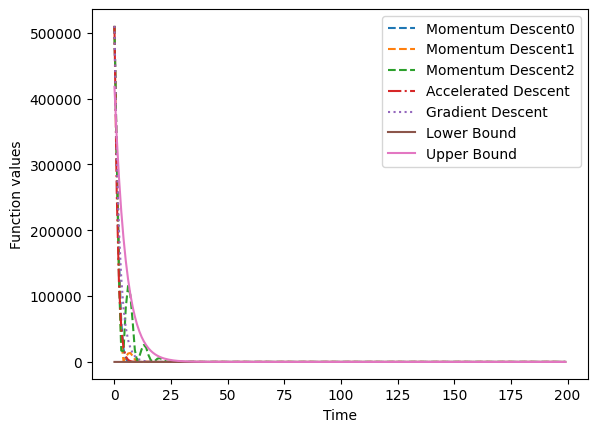

In [21]:

for i, fmom in enumerate(fmom_all):
    plt.plot(fmom, label="Momentum Descent"+str(i),linestyle="--")
    print(mom_desc_all[i],"\n")

plt.plot(facc, label="Accelerated Descent", linestyle="-.")
plt.ylabel("Function values")
plt.plot(fgd, label="Gradient Descent", linestyle=":")
plt.plot(lower_bound, label="Lower Bound", linestyle="solid")
plt.plot(upper_bound, label="Upper Bound", linestyle="solid")
plt.legend()

plt.xlabel("Time")
plt.show()

Log graph of te previous cell

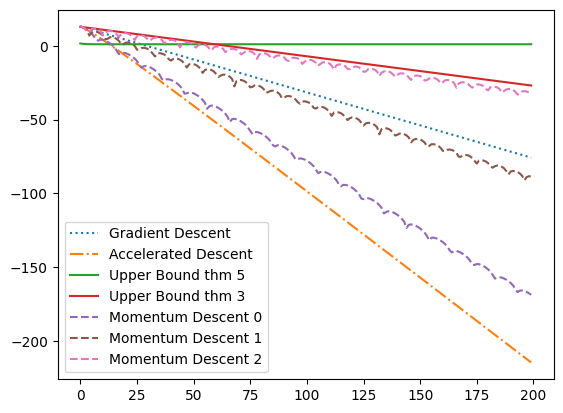

In [22]:

plt.plot(lfgd, linestyle=":", label="Gradient Descent")

plt.plot(lfacc, linestyle="-.", label="Accelerated Descent")
plt.plot(np.log(lower_bound), label="Upper Bound thm 5", linestyle="solid")
plt.plot(np.log(upper_bound), label="Upper Bound thm 3", linestyle="solid")
for i, lfmom in enumerate(lfmom_all):
    plt.plot(lfmom, linestyle="--", label="Momentum Descent " + str(i))

plt.legend()
plt.show()

### Conclusion
Gradient descent,Accelerated Gradient descent and momentum descent studied for given random variable
In momentum descent , extent of convergence is higher for the higher myu 

### Extent of convergence 
momentum descent < gradient descent < accelerated descent

studied for $\eta$ = 0.2 , $\kappa$ =5

Repeating the previous steps for $\kappa$ = 20 ,T=200

In [23]:
k=20
eta=1/beta_(x0, k)
is_convex_, dx, hess, alpha, beta, gdx, fgd, x_acc, facc, mom_desc_all, fmom_all, lfgd, lfacc, lfmom_all=function(x0, k, eta, T)

In [24]:
print(dx)
print(hess)
print("alpha: ", alpha)
print("beta: ", beta)
gamma=1/(np.sqrt(k)-1)
upper_bound=np.exp(-time_array / k) * f(x0, k)
lower_bound=((1+gamma)**(-time_array))*(alpha+beta)/2

[ 8.82624848e+01  9.27096958e+01  8.86952690e+01  6.96772449e+01
  7.20230997e+01  1.21601938e+02 -6.26671615e+00  6.70645777e+01
 -7.89531069e+01 -9.35637311e+00 -1.67292828e+02 -6.06424425e-01
 -2.91376342e+01  5.40151218e+01 -3.54237774e+01  1.97413176e+02
  1.39200164e+02 -1.48829699e+02 -1.74449411e+02  1.72813842e+02
  1.57743970e+02 -2.09617714e+02  5.89543165e+01 -2.49345484e+01
 -9.90308646e+00 -2.41348667e+01  1.59674143e+01 -1.08286631e+02
  7.26800218e+01  1.36920446e+01  1.01750539e+02 -3.98904846e+01
 -7.71719998e+01 -7.79433782e+01  1.09859998e+02  1.21781647e+02
  2.12556742e+02 -1.08088217e+02  5.99681319e+01 -1.46135532e+02
 -4.53883180e+01  4.65526062e+01 -1.07946111e+02  1.43681441e+02
  4.28057774e+01 -2.99972723e+01 -1.43382015e+02  3.28309331e+01
  1.50205035e+01  1.03536973e+01  1.23053355e+02  3.88105184e+01
 -2.09172394e+02  9.17890308e+01  8.76402331e+01 -3.17489568e+01
  5.17094748e+01  2.77753194e+01  1.15953034e+02 -5.07145008e+01
  2.84234546e+01  3.24369

In [25]:
print("Gradient Descent:\n", gdx, "\n\nf(x) v T:\n", fgd)

Gradient Descent:
 [ 3.09383542e-03  3.24972203e-03  3.10900566e-03  2.44237321e-03
  2.52460168e-03  4.26247216e-03 -2.19665110e-04  2.35079226e-03
 -2.76751691e-03 -3.27965824e-04 -5.86405968e-03 -2.12567930e-05
 -1.02135177e-03  1.89337404e-03 -1.24169785e-03  6.91985818e-03
  4.87933688e-03 -5.21687776e-03 -6.11491700e-03  6.05758593e-03
  5.52934675e-03 -7.34765976e-03  2.06650598e-03 -8.74022403e-04
 -3.47129584e-04 -8.45991426e-04  5.59700445e-04 -3.79573513e-03
  2.54762855e-03  4.79942670e-04  3.56662767e-03 -1.39826784e-03
 -2.70508435e-03 -2.73212322e-03  3.85088586e-03  4.26877144e-03
  7.45068052e-03 -3.78878021e-03  2.10204291e-03 -5.12244003e-03
 -1.59098156e-03  1.63179297e-03 -3.78379901e-03  5.03641758e-03
  1.50045663e-03 -1.05148437e-03 -5.02592191e-03  1.15081174e-03
  5.26508697e-04  3.62924694e-04  4.31334819e-03  1.36041215e-03
 -7.33205010e-03  3.21745026e-03  3.07202384e-03 -1.11288559e-03
  1.81255496e-03  9.73599002e-04  4.06446299e-03 -1.77767847e-03
  9.96

In [26]:
print("Accelerated Descent\n:", x_acc, "\n\nf(x) V T\n", facc)

Accelerated Descent
: [ 3.44125659e-19  3.61464842e-19  3.45813036e-19  2.71663865e-19
  2.80810094e-19  4.74112498e-19 -2.44332326e-20  2.61477365e-19
 -3.07829425e-19 -3.64794631e-20 -6.52256221e-19 -2.36438171e-21
 -1.13604410e-19  2.10598981e-19 -1.38113387e-19  7.69692123e-19
  5.42726030e-19 -5.80270522e-19 -6.80158946e-19  6.73782042e-19
  6.15026280e-19 -8.17276264e-19  2.29856355e-19 -9.72170442e-20
 -3.86110379e-20 -9.40991736e-20  6.22551810e-20 -4.22197587e-19
  2.83371360e-19  5.33837664e-20  3.96714087e-19 -1.55528584e-19
 -3.00885085e-19 -3.03892604e-19  4.28331974e-19  4.74813164e-19
  8.28735208e-19 -4.21423995e-19  2.33809109e-19 -5.69766264e-19
 -1.76964028e-19  1.81503459e-19 -4.20869939e-19  5.60198033e-19
  1.66894988e-19 -1.16956044e-19 -5.59030605e-19  1.28004174e-19
  5.85632806e-20  4.03679196e-20  4.79771411e-19  1.51317915e-19
 -8.15540010e-19  3.57875271e-19  3.41699568e-19 -1.23785668e-19
  2.01609519e-19  1.08292896e-19  4.52088044e-19 -1.97730225e-19
  1



Momentum Decent: [ 7.40852397e-07  7.78181132e-07  7.44485075e-07  5.84852715e-07
  6.04543211e-07  1.02069512e-06 -5.26011894e-08  5.62922665e-07
 -6.62711894e-07 -7.85349682e-08 -1.40421260e-06 -5.09016928e-09
 -2.44573741e-07  4.53388917e-07 -2.97337996e-07  1.65703498e-06
  1.16841006e-06 -1.24923788e-06 -1.46428310e-06  1.45055455e-06
  1.32406196e-06 -1.75947670e-06  4.94847236e-07 -2.09294130e-07
 -8.31239382e-08 -2.02581809e-07  1.34026333e-07 -9.08929882e-07
  6.10057245e-07  1.14927470e-07  8.54067621e-07 -3.34830377e-07
 -6.47761743e-07 -6.54236493e-07  9.22136322e-07  1.02220355e-06
  1.78414614e-06 -9.07264451e-07  5.03356940e-07 -1.22662374e-06
 -3.80977765e-07  3.90750498e-07 -9.06071650e-07  1.20602473e-06
  3.59300589e-07 -2.51789320e-07 -1.20351143e-06  2.75574334e-07
  1.26078209e-07  8.69062483e-08  1.03287793e-06  3.25765422e-07
 -1.75573880e-06  7.70453309e-07  7.35629377e-07 -2.66492506e-07
  4.34035915e-07  2.33138825e-07  9.73279680e-07 -4.25684361e-07
  2.38

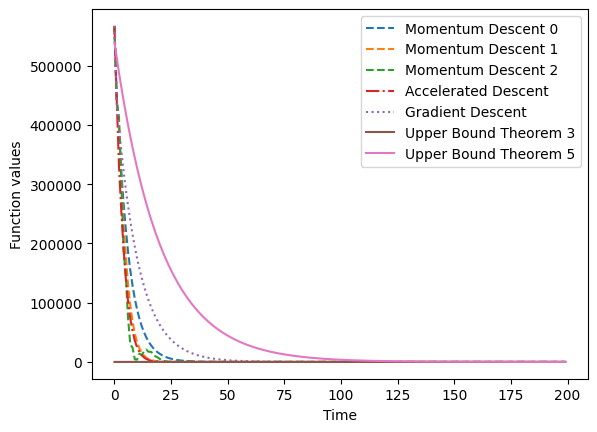

In [27]:
for i, fmom in enumerate(fmom_all):
    
    plt.plot(fmom, label="Momentum Descent "+ str(i), linestyle="--")
    
    print("\n\nMomentum Decent:", mom_desc_all[i], "\nf(x) v T\n", fmom)
plt.plot(facc, label="Accelerated Descent", linestyle="-.")
plt.ylabel("Function values")
plt.plot(fgd, label="Gradient Descent", linestyle=":")

plt.plot(lower_bound, label="Upper Bound Theorem 3", linestyle="solid")
plt.plot(upper_bound, label="Upper Bound Theorem 5", linestyle="solid")
plt.xlabel("Time")
plt.legend()
plt.show()

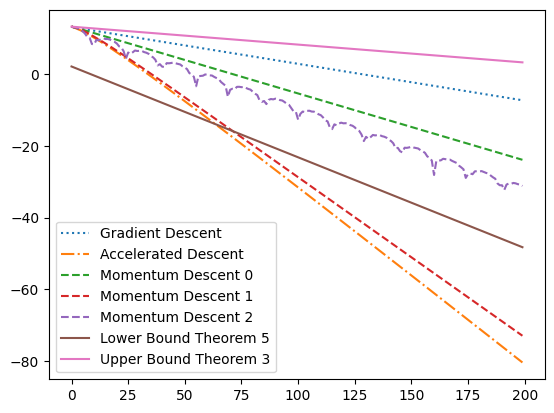

In [28]:
plt.plot(lfgd, linestyle=":", label="Gradient Descent")
plt.plot(lfacc, linestyle="-.", label="Accelerated Descent")
for i, lfmom in enumerate(lfmom_all):
    plt.plot(lfmom, linestyle="--", label="Momentum Descent " + str(i))
plt.plot(np.log(lower_bound), label="Lower Bound Theorem 5", linestyle="solid")
plt.plot(np.log(upper_bound), label="Upper Bound Theorem 3", linestyle="solid")

plt.legend()
plt.show()

**Conclusion:** 

Gradient Descent and Momentum descent slowed down significantly in their rate of convergence whereas Accelerated Descent remained significantly faster

Repeating the steps 4-8 for $\kappa$=50 , T=200

In [29]:
k=50
eta=1/beta_(x0, k)

is_convex_, dx, hess, alpha, beta, gdx, fgd, x_acc, facc, mom_desc_all, fmom_all, lfgd, lfacc, lfmom_all=function(x0, k, eta, T)

In [30]:
print(dx)
print(hess)
print("alpha: ", alpha)
print("beta: ", beta)
gamma=1/(np.sqrt(k)-1)
upper_bound=np.exp(-time_array / k) * f(x0, k)
lower_bound=((1+gamma)**(-time_array))*(alpha+beta)/2

[ 8.82624848e+01  9.27096958e+01  8.86952690e+01  6.96772449e+01
  7.20230997e+01  1.21601938e+02 -6.26671615e+00  6.70645777e+01
 -7.89531069e+01 -9.35637311e+00 -1.67292828e+02 -6.06424425e-01
 -2.91376342e+01  5.40151218e+01 -3.54237774e+01  1.97413176e+02
  1.39200164e+02 -1.48829699e+02 -1.74449411e+02  1.72813842e+02
  1.57743970e+02 -2.09617714e+02  5.89543165e+01 -2.49345484e+01
 -9.90308646e+00 -2.41348667e+01  1.59674143e+01 -1.08286631e+02
  7.26800218e+01  1.36920446e+01  1.01750539e+02 -3.98904846e+01
 -7.71719998e+01 -7.79433782e+01  1.09859998e+02  1.21781647e+02
  2.12556742e+02 -1.08088217e+02  5.99681319e+01 -1.46135532e+02
 -4.53883180e+01  4.65526062e+01 -1.07946111e+02  1.43681441e+02
  4.28057774e+01 -2.99972723e+01 -1.43382015e+02  3.28309331e+01
  1.50205035e+01  1.03536973e+01  1.23053355e+02  3.88105184e+01
 -2.09172394e+02  9.17890308e+01  8.76402331e+01 -3.17489568e+01
  5.17094748e+01  2.77753194e+01  1.15953034e+02 -5.07145008e+01
  2.84234546e+01  3.24369

In [31]:
print("Gradient Descent:\n", gdx, "\n\nf(x) v T:\n", fgd)

Gradient Descent:
 [ 1.55235587  1.63057318  1.55996765  1.22547966  1.26673843  2.1387284
 -0.11021867  1.17952821 -1.38862303 -0.16455939 -2.94233733 -0.01066576
 -0.51247115  0.95001508 -0.62303151  3.4720924   2.44824505 -2.6176088
 -3.06820693  3.03944063  2.77439253 -3.68674516  1.03688537 -0.43854751
 -0.17417496 -0.42448275  0.28083403 -1.90453948  1.27829234  0.24081495
  1.78958304 -0.70159171 -1.35729701 -1.37086397  1.93221179  2.14188911
  3.73843662 -1.90104979  1.0547163  -2.57022394 -0.79828731  0.81876475
 -1.89855044  2.5270615   0.75286573 -0.52759042 -2.52179522  0.5774287
  0.26417981  0.18210027  2.16425584  0.68259733 -3.67891289  1.61438057
  1.54141174 -0.55839896  0.90946348  0.48851083  2.03937577 -0.89196393
  0.4999102   0.0570499  -0.53858919  1.11784271 -0.25815046 -2.27847677
 -3.80865135  0.20291746  0.05489828  2.01912234  0.45244703 -2.22529879
 -0.45349335  2.16912306 -0.13727613 -0.06277697 -3.29141418  2.33002001
  0.53175897  0.85722473  3.3555980

In [32]:
print("Accelerated Descent\n:", x_acc, "\n\nf(x) V T\n", facc)

Accelerated Descent
: [ 1.29739787e-10  1.36276882e-10  1.30375950e-10  1.02420762e-10
  1.05869007e-10  1.78746493e-10 -9.21164209e-12  9.85803206e-11
 -1.16055642e-10 -1.37532255e-11 -2.45908962e-10 -8.91402232e-13
 -4.28303199e-11  7.93985172e-11 -5.20705185e-11  2.90183803e-10
  2.04614675e-10 -2.18769430e-10 -2.56428647e-10  2.54024472e-10
  2.31872797e-10 -3.08123634e-10  8.66587940e-11 -3.66520727e-11
 -1.45568566e-11 -3.54765954e-11  2.34710018e-11 -1.59173906e-10
  1.06834637e-10  2.01263647e-11  1.49566300e-10 -5.86362711e-11
 -1.13437536e-10 -1.14571410e-10  1.61486648e-10  1.79010653e-10
  3.12443803e-10 -1.58882252e-10  8.81490329e-11 -2.14809190e-10
 -6.67177085e-11  6.84291320e-11 -1.58673366e-10  2.11201844e-10
  6.29215512e-11 -4.40939288e-11 -2.10761709e-10  4.82592155e-11
  2.20791080e-11  1.52192235e-11  1.80879976e-10  5.70487950e-11
 -3.07469045e-10  1.34923568e-10  1.28825120e-10 -4.66687848e-11
  7.60093746e-11  4.08278108e-11  1.70442991e-10 -7.45468310e-11
  4



Momentum Decent: [ 8.70574898e-02  9.14439857e-02  8.74843654e-02  6.87259830e-02
  7.10398113e-02  1.19941780e-01 -6.18116041e-03  6.61489850e-02
 -7.78752072e-02 -9.22863613e-03 -1.65008879e-01 -5.98145274e-04
 -2.87398354e-02  5.32776856e-02 -3.49401577e-02  1.94718012e-01
  1.37299747e-01 -1.46797816e-01 -1.72067758e-01  1.70454518e-01
  1.55590386e-01 -2.06755928e-01  5.81494484e-02 -2.45941319e-02
 -9.76788553e-03 -2.38053677e-02  1.57494207e-02 -1.06808258e-01
  7.16877648e-02  1.35051153e-02  1.00361399e-01 -3.93458836e-02
 -7.61184165e-02 -7.68792637e-02  1.08360145e-01  1.20119035e-01
  2.09654831e-01 -1.06612553e-01  5.91494228e-02 -1.44140431e-01
 -4.47686584e-02  4.59170512e-02 -1.06472387e-01  1.41719844e-01
  4.22213757e-02 -2.95877374e-02 -1.41424506e-01  3.23827119e-02
  1.48154375e-02  1.02123444e-02  1.21373381e-01  3.82806615e-02
 -2.06316688e-01  9.05358900e-02  8.64437333e-02 -3.13155073e-02
  5.10035162e-02  2.73961196e-02  1.14369996e-01 -5.00221259e-02
  2.80

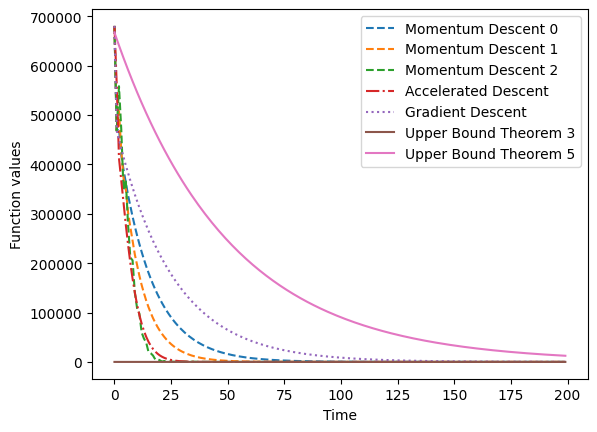

In [33]:
for i, fmom in enumerate(fmom_all):
    
    plt.plot(fmom, label="Momentum Descent "+ str(i), linestyle="--")
    
    print("\n\nMomentum Decent:", mom_desc_all[i], "\nf(x) v T\n", fmom)
plt.plot(facc, label="Accelerated Descent", linestyle="-.")
plt.ylabel("Function values")
plt.plot(fgd, label="Gradient Descent", linestyle=":")
plt.plot(lower_bound, label="Upper Bound Theorem 3", linestyle="solid")
plt.plot(upper_bound, label="Upper Bound Theorem 5", linestyle="solid")
plt.legend()

plt.xlabel("Time")
plt.show()

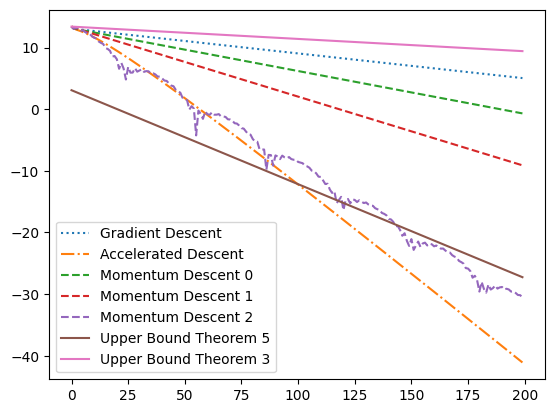

In [34]:
plt.plot(lfgd, linestyle=":", label="Gradient Descent")
plt.plot(lfacc, linestyle="-.", label="Accelerated Descent")
for i, lfmom in enumerate(lfmom_all):
    plt.plot(lfmom, linestyle="--", label="Momentum Descent " + str(i))
plt.plot(np.log(lower_bound), label="Upper Bound Theorem 5", linestyle="solid")
plt.plot(np.log(upper_bound), label="Upper Bound Theorem 3", linestyle="solid")
plt.legend()
plt.show()

**Conclusion:** for $\kappa$=50
Momentum descent and Gradient descent converges very slowly but accelerated gradient converges

Repeating the steps 4-8 for n=0.4 , $\kappa$=5,T=200

In [35]:
k=5
eta=1/beta_(x0, k)
eta*=2
is_convex_, dx, hess, alpha, beta, gdx, fgd, x_acc, facc, mom_desc_all, fmom_all, lfgd, lfacc, lfmom_all=function(x0, k, eta, T)

In [36]:
print(dx)
print(hess)
print("alpha: ", alpha)
print("beta: ", beta)
gamma=1/(np.sqrt(k)-1)
upper_bound=np.exp(-time_array / k) * f(x0, k)
lower_bound=((1+gamma)**(-time_array))*(alpha+beta)/2

[  88.26248484   92.70969585   88.69526898   69.67724487   72.02309968
  121.60193833   -6.26671615   67.06457771  -78.9531069    -9.35637311
 -167.29282843   -0.60642442  -29.13763417   54.0151218   -35.42377738
  197.41317623  139.20016364 -148.8296988  -174.44941148  172.81384216
  157.74397045 -209.61771375   58.95431652  -24.9345484    -9.90308646
  -24.13486665   15.96741431 -108.28663078   72.68002176   13.6920446
  101.75053861  -39.89048455  -77.17199975  -77.94337816  109.85999841
  121.78164744  212.5567416  -108.08821728   59.9681319  -146.13553209
  -45.38831803   46.55260617 -107.94611125  143.68144056   42.80577742
  -29.99727227 -143.38201471   32.83093307   15.02050352   10.35369725
  123.05335509   38.8105184  -209.1723937    91.78903085   87.6402331
  -31.74895684   51.70947485   27.77531942  115.95303376  -50.71450075
   28.42345457    3.24369305  -30.62263071   63.5573179   -14.67769177
 -129.54762846 -216.54894878   11.53730251    3.12135824  114.8014825
   25.724

In [37]:
print("Accelerated Descent\n:", x_acc, "\n\nf(x) V T\n", facc)

Accelerated Descent
: [ 1.79982362e-48  1.89050989e-48  1.80864883e-48  1.42083867e-48
  1.46867467e-48  2.47967232e-48 -1.27789103e-49  1.36756190e-48
 -1.60998942e-48 -1.90792513e-49 -3.41138803e-48 -1.23660353e-50
 -5.94166393e-49  1.10146108e-48 -7.22351647e-49  4.02559364e-48
  2.83853036e-48 -3.03489311e-48 -3.55732305e-48  3.52397098e-48
  3.21667042e-48 -4.27446512e-48  1.20217974e-48 -5.08458257e-49
 -2.01940937e-49 -4.92151373e-49  3.25602995e-49 -2.20815034e-48
  1.48207044e-48  2.79204300e-49  2.07486820e-48 -8.13435476e-49
 -1.57366959e-48 -1.58939932e-48  2.24023401e-48  2.48333690e-48
  4.33439694e-48 -2.20410435e-48  1.22285318e-48 -2.97995443e-48
 -9.25545741e-49  9.49287575e-49 -2.20120656e-48  2.92991129e-48
  8.72883303e-49 -6.11695890e-49 -2.92380548e-48  6.69479099e-49
  3.06293858e-49  2.11129665e-49  2.50926920e-48  7.91413112e-49
 -4.26538428e-48  1.87173595e-48  1.78713484e-48 -6.47415746e-49
  1.05444498e-48  5.66386456e-49  2.36448146e-48 -1.03415575e-48
  5



Momentum Decent: [ 1.49084874e-38  1.56596694e-38  1.49815893e-38  1.17692395e-38
  1.21654798e-38  2.05398813e-38 -1.05851607e-39  1.13279318e-38
 -1.33360329e-38 -1.58039252e-39 -2.82575664e-38 -1.02431638e-40
 -4.92166125e-39  9.12373772e-39 -5.98345876e-39  3.33452186e-38
  2.35124117e-38 -2.51389443e-38 -2.94663906e-38  2.91901252e-38
  2.66446611e-38 -3.54066968e-38  9.95802108e-39 -4.21171465e-39
 -1.67273831e-39 -4.07663976e-39  2.69706881e-39 -1.82907820e-38
  1.22764410e-38  2.31273428e-39  1.71867654e-38 -6.73793387e-39
 -1.30351846e-38 -1.31654788e-38  1.85565408e-38  2.05702361e-38
  3.59031304e-38 -1.82572678e-38  1.01292654e-38 -2.46838704e-38
 -7.66657735e-39  7.86323819e-39 -1.82332646e-38  2.42693478e-38
  7.23035833e-39 -5.06686341e-39 -2.42187716e-38  5.54549934e-39
  2.53712534e-39  1.74885134e-39  2.07850413e-38  6.55551592e-39
 -3.53314775e-38  1.55041591e-38  1.48033823e-38 -5.36274187e-39
  8.73428904e-39  4.69155157e-39  1.95857203e-38 -8.56622716e-39
  4.80

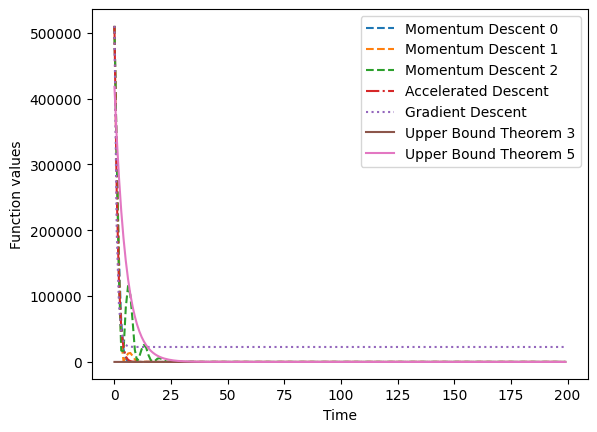

In [38]:
for i, fmom in enumerate(fmom_all):
    
    plt.plot(fmom, label="Momentum Descent "+ str(i), linestyle="--")
    
    print("\n\nMomentum Decent:", mom_desc_all[i], "\nf(x) v T\n", fmom)
plt.plot(facc, label="Accelerated Descent", linestyle="-.")
plt.ylabel("Function values")
plt.plot(fgd, label="Gradient Descent", linestyle=":")
plt.plot(lower_bound, label="Upper Bound Theorem 3", linestyle="solid")
plt.plot(upper_bound, label="Upper Bound Theorem 5", linestyle="solid")
plt.legend()

plt.xlabel("Time")
plt.show()

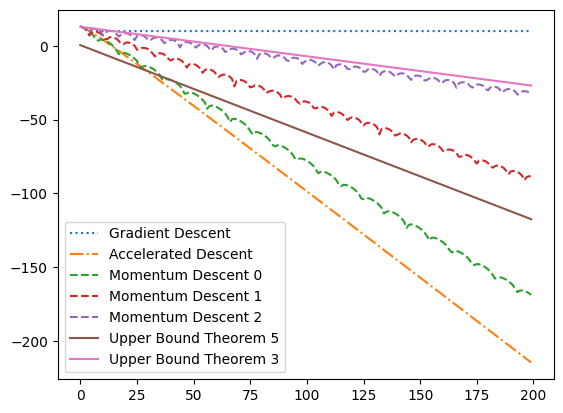

In [39]:
plt.plot(lfgd, linestyle=":", label="Gradient Descent")
plt.plot(lfacc, linestyle="-.", label="Accelerated Descent")
for i, lfmom in enumerate(lfmom_all):
    plt.plot(lfmom, linestyle="--", label="Momentum Descent " + str(i))
plt.plot(np.log(lower_bound), label="Upper Bound Theorem 5", linestyle="solid")
plt.plot(np.log(upper_bound), label="Upper Bound Theorem 3", linestyle="solid")

plt.legend()
plt.show()

### Conclusion 
Gradient descent fails to converge for double step size